In [165]:
import tensorflow as tf
import pandas as pd

In [166]:
print(tf.__version__)

1.12.0


In [167]:
tf.enable_eager_execution()

In [275]:
#tfdata=tf.data.experimental
#tfdata.make_csv_dataset('titanic_train.csv',batch_size=1)

In [173]:
def train_set():
    train =tf.data.experimental.make_csv_dataset('titanic_train.csv',header=True,shuffle=True,
        shuffle_buffer_size=10000, num_epochs=None,label_name='survived', batch_size=n_obs)
    return train  
def test_set():
    test =tf.data.experimental.make_csv_dataset('titanic_eval.csv',header=True,shuffle=False,
        shuffle_buffer_size=10000, num_epochs=1,label_name='survived', batch_size=n_obs)
    return test 

In [169]:
dftrain=pd.read_csv('titanic_train.csv',header=0,sep=',')
dftest=pd.read_csv('titanic_eval.csv',header=0,sep=',')
y_train = dftrain.pop('survived')
n_obs = len(y_train)
y_eval = dftest['survived']

In [174]:
features, labels = next(iter(train_set()))
print(features['sex'].numpy()[:5])
print(labels.numpy()[:5])
#print(features)

[b'female' b'male' b'male' b'female' b'female']
[1 0 0 1 1]


In [191]:
fc=tf.feature_column
feature_columns = []
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

def one_hot(feature_name, vocab):
      return fc.indicator_column(
          fc.categorical_column_with_vocabulary_list(feature_name,vocab))
    
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(one_hot(feature_name, vocabulary))  

"""for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(fc.numeric_column(feature_name,
                                           dtype=tf.float32))"""
feature_columns    

[_IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='e

In [177]:
vocabulary=dftrain['sex'].unique()
class_fc = one_hot('sex', vocabulary)
class_fc
print(fc.input_layer(features, [class_fc]).numpy())

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:
#itera = train.make_one_shot_iterator()
#data=itera.get_next()
features, labels = next(iter(train_set()))
#print(features['sex'].numpy())
#print(labels.numpy())
#print(train_set())

In [178]:
example = dftrain.head(2)
#vocabulary = dftrain['sex'].unique()
#print(vocabulary)
#class_fc = one_hot('sex', vocabulary)
#print(class_fc)
#print('Feature value: "{}"'.format(example['class'].iloc[1]))
#print(fc.input_layer(dict(example), [class_fc]).numpy())
#print(features['sex'].numpy())
#print(fc.input_layer(features, feature_columns).numpy())
print(fc.input_layer(dict(example), feature_columns).numpy())
example

[[22.      1.      0.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   7.25    1.      0.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [38.      1.      0.      0.      1.      0.      0.      1.      0.
   0.      0.      0.      0.      0.      0.      1.      0.      0.
  71.2833  1.      0.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      0.      1.    ]]


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n


In [185]:
train_set

<function __main__.train_set>

In [180]:
linear_est = tf.estimator.LinearClassifier(feature_columns)
# Entrenamiento
modelo=linear_est.train(train_set, max_steps=100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jimmy\\AppData\\Local\\Temp\\tmpp745rpg6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017B93F8AD30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

In [188]:
# Evaluacion.
results = linear_est.evaluate(test_set)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-28-23:31:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jimmy\AppData\Local\Temp\tmpp745rpg6\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-28-23:31:18
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.78409094, accuracy_baseline = 0.625, auc = 0.84037346, auc_precision_recall = 0.7914383, average_loss = 0.459138, global_step = 100, label/mean = 0.375, loss = 121.21243, precision = 0.7234042, prediction/mean = 0.3758808, recall = 0.68686867
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: C:\Users\jimmy\AppData\Local\Temp\tmpp745rpg6\model.ckpt-100


In [189]:
print('results['accuracy'])

{'accuracy': 0.78409094, 'accuracy_baseline': 0.625, 'auc': 0.84037346, 'auc_precision_recall': 0.7914383, 'average_loss': 0.459138, 'label/mean': 0.375, 'loss': 121.21243, 'precision': 0.7234042, 'prediction/mean': 0.3758808, 'recall': 0.68686867, 'global_step': 100}


In [92]:
age = fc.numeric_column('age')
fare = fc.numeric_column('fare')

In [93]:
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
fare_buckets = tf.feature_column.bucketized_column(
    fare, boundaries=[50, 100, 150, 200 , 250, 300, 350, 400, 450,500,550])

In [192]:
params = {
  'n_trees': 100,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  'feature_columns':feature_columns+[age_buckets, fare_buckets],  
  'center_bias': True
}
est = tf.estimator.BoostedTreesClassifier( **params)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jimmy\\AppData\\Local\\Temp\\tmp8na9fl4b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017B9727E898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [193]:
est.train(train_set, max_steps=100)
results = est.evaluate(test_set)
print('Accuracy : ', results['accuracy'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jimmy\AppData\Local\Temp\tmp8na9fl4b\model.ckpt.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:loss = 0.6931468, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\jimmy\AppD

In [147]:
est.predict(test_set)

<generator object Estimator.predict at 0x0000017B99CBD990>


In [194]:
pred_dicts = list(est.predict(test_set))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jimmy\AppData\Local\Temp\tmp8na9fl4b\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


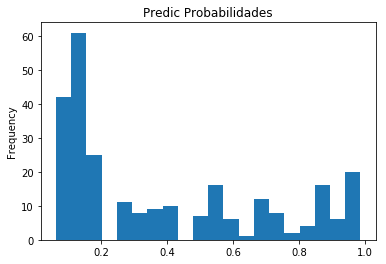

In [195]:
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
probs.plot(kind='hist', bins=20, title='Predic Probabilidades')

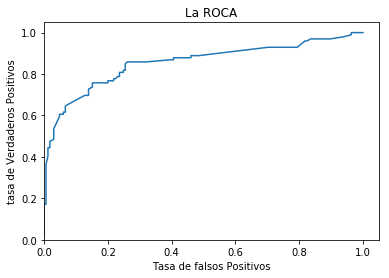

In [148]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('La ROC')
plt.xlabel('Tasa de falsos Positivos')
plt.ylabel('tasa de Verdaderos Positivos')
plt.xlim(0,)
plt.ylim(0,);